# <font color=blue>Smart-resto</font>

<b><font color=orange>Problem Statement :</font></b>

~40 %   of the food produced in India is wasted.<br>
~84.7 % of the total food waste recorded was thrown in the bin. <br>
~18.7kgs  of food are disposed off by one Safal outlet daily. 



    
 - A significant portion of the food waste binned was still in edible condition.

 - One of root cause could be due to more Supply of foods when there is less demand.

 - There is no adequate information or prediction about food sales on daily basis

In [315]:
#importing libraries
import pandas as pd
import numpy as np

#importing libraries for plots and graphs
import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import division

In [316]:
#Pandas Dataframe
resto = pd.read_csv('Resto-new.csv')

In [317]:
#Reading the Dataframe
resto.head()

,Resto Name,Address,Registration No,Date,Day,Menu,Code,Type,Price,Qty_Prep_kg,Qty_Sold_kg,Holiday
0,Anjappar,Mylapore,23456,01-01-2020,Wednesday,Vegetable Briyani,VB,Lunch,160,30,25,New Year
1,Anjappar,Mylapore,23456,01-01-2020,Wednesday,Vegretable Fried Rice,VFR,Lunch,180,30,28,New Year
2,Anjappar,Mylapore,23456,01-01-2020,Wednesday,Veg thali meals,VMLS,Lunch,190,45,30,New Year
3,Anjappar,Mylapore,23456,01-01-2020,Wednesday,Non-veg thali meals,NV MEALS,Lunch,225,60,46,New Year
4,Anjappar,Mylapore,23456,01-01-2020,Wednesday,Chicken Briyani,CB,Lunch,265,60,60,New Year


In [318]:
resto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Resto Name       434 non-null    object
 1   Address          434 non-null    object
 2   Registration No  434 non-null    int64 
 3   Date             434 non-null    object
 4   Day              434 non-null    object
 5   Menu             434 non-null    object
 6   Code             434 non-null    object
 7   Type             434 non-null    object
 8   Price            434 non-null    int64 
 9   Qty_Prep_kg      434 non-null    int64 
 10  Qty_Sold_kg      434 non-null    int64 
 11  Holiday          434 non-null    object
dtypes: int64(4), object(8)
memory usage: 40.8+ KB


#### Derived column 

In [319]:
#This Qty_wasted will be our target variable
resto['Qty_wasted'] = resto['Qty_Prep_kg'] - resto['Qty_Sold_kg']

In [320]:
# Check any number of columns with NaN or missing values 
print(resto.isnull().any().sum(), ' / ', len(resto.columns))

0  /  13


In [321]:
# Check any number of data points with NaN
print(resto.isnull().any(axis=1).sum(), ' / ', len(resto))

0  /  434


#### Good , We have no missing values 

In [322]:
#Purging Resto name, address and registration column
resto = resto.drop(['Resto Name ','Address', 'Registration No', 'Type', 'Menu'],axis=1)

In [323]:
resto.shape

(434, 8)

In [324]:
 resto['Date'] = pd.to_datetime(resto['Date'], format='%d-%m-%Y', errors='coerce')

In [325]:
# Check any number of columns with NaN or missing values 
print(resto.isnull().any().sum(), ' / ', len(resto.columns))

0  /  8


In [326]:
resto[resto['Date'].isnull()]

,Date,Day,Code,Price,Qty_Prep_kg,Qty_Sold_kg,Holiday,Qty_wasted


In [327]:
resto.head()

,Date,Day,Code,Price,Qty_Prep_kg,Qty_Sold_kg,Holiday,Qty_wasted
0,2020-01-01,Wednesday,VB,160,30,25,New Year,5
1,2020-01-01,Wednesday,VFR,180,30,28,New Year,2
2,2020-01-01,Wednesday,VMLS,190,45,30,New Year,15
3,2020-01-01,Wednesday,NV MEALS,225,60,46,New Year,14
4,2020-01-01,Wednesday,CB,265,60,60,New Year,0


### One Hot Encoding 

In [328]:
resto_Day = pd.get_dummies(resto['Day'], drop_first=True)

In [329]:
resto_Day.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [330]:
resto_Code = pd.get_dummies(resto['Code'], drop_first=True)

In [331]:
resto_Code.head()

,MB,NV MEALS,PB,VB,VFR,VMLS
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,1,0,0,0,0
4,0,0,0,0,0,0


In [332]:
resto_Holiday = pd.get_dummies(resto['Holiday'], drop_first=True)

In [333]:
resto_Holiday.head()

,New Year,Republic Day,Working Day
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [334]:
#Concatinating all dummies into original Data Frame
resto = pd.concat([resto_Day,resto],axis=1)
resto = pd.concat([resto_Code,resto],axis=1)
resto = pd.concat([resto_Holiday,resto],axis=1)

In [335]:
resto.head()

,New Year,Republic Day,Working Day,MB,NV MEALS,PB,VB,VFR,VMLS,Monday,...,Tuesday,Wednesday,Date,Day,Code,Price,Qty_Prep_kg,Qty_Sold_kg,Holiday,Qty_wasted
0,1,0,0,0,0,0,1,0,0,0,...,0,1,2020-01-01,Wednesday,VB,160,30,25,New Year,5
1,1,0,0,0,0,0,0,1,0,0,...,0,1,2020-01-01,Wednesday,VFR,180,30,28,New Year,2
2,1,0,0,0,0,0,0,0,1,0,...,0,1,2020-01-01,Wednesday,VMLS,190,45,30,New Year,15
3,1,0,0,0,1,0,0,0,0,0,...,0,1,2020-01-01,Wednesday,NV MEALS,225,60,46,New Year,14
4,1,0,0,0,0,0,0,0,0,0,...,0,1,2020-01-01,Wednesday,CB,265,60,60,New Year,0


In [336]:
#deleting the original columns 
resto = resto.drop(['Day', 'Holiday', 'Code'],axis=1)

In [337]:
resto.head()

,New Year,Republic Day,Working Day,MB,NV MEALS,PB,VB,VFR,VMLS,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Date,Price,Qty_Prep_kg,Qty_Sold_kg,Qty_wasted
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2020-01-01,160,30,25,5
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2020-01-01,180,30,28,2
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2020-01-01,190,45,30,15
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2020-01-01,225,60,46,14
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2020-01-01,265,60,60,0


In [338]:
resto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   New Year      434 non-null    uint8         
 1   Republic Day  434 non-null    uint8         
 2   Working Day   434 non-null    uint8         
 3   MB            434 non-null    uint8         
 4   NV MEALS      434 non-null    uint8         
 5   PB            434 non-null    uint8         
 6   VB            434 non-null    uint8         
 7   VFR           434 non-null    uint8         
 8   VMLS          434 non-null    uint8         
 9   Monday        434 non-null    uint8         
 10  Saturday      434 non-null    uint8         
 11  Sunday        434 non-null    uint8         
 12  Thursday      434 non-null    uint8         
 13  Tuesday       434 non-null    uint8         
 14  Wednesday     434 non-null    uint8         
 15  Date          434 non-null    datetime64

#### Now we have all features as Int or Float object

In [339]:
#checking correlation
corr = resto.corr()

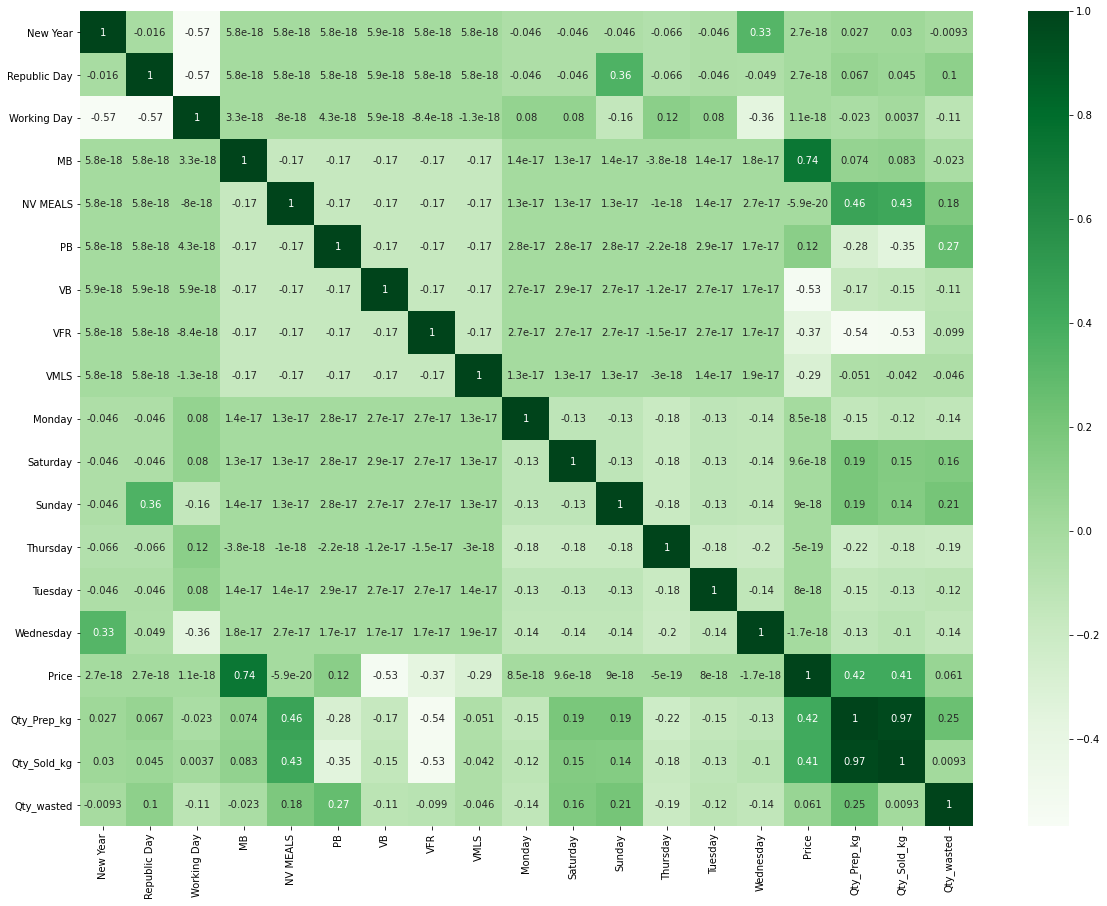

In [340]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,cmap='Greens', annot=True)
plt.show()

In [341]:
resto.columns

Index(['New Year', 'Republic Day', 'Working Day', 'MB', 'NV MEALS', 'PB', 'VB',
       'VFR', 'VMLS', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Date', 'Price', 'Qty_Prep_kg', 'Qty_Sold_kg',
       'Qty_wasted'],
      dtype='object')

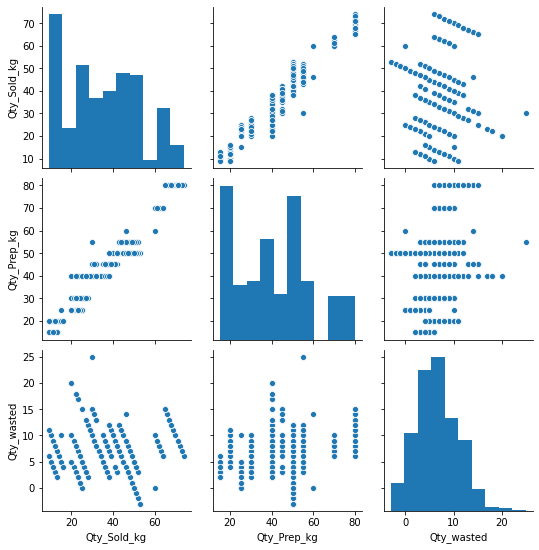

In [342]:
#Ploting Scatterplot
sns.pairplot(resto, vars=['Qty_Sold_kg', 'Qty_Prep_kg', 'Qty_wasted'])

In [343]:
resto.head()

,New Year,Republic Day,Working Day,MB,NV MEALS,PB,VB,VFR,VMLS,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Date,Price,Qty_Prep_kg,Qty_Sold_kg,Qty_wasted
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2020-01-01,160,30,25,5
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2020-01-01,180,30,28,2
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2020-01-01,190,45,30,15
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2020-01-01,225,60,46,14
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2020-01-01,265,60,60,0


#### X and Y Split

In [344]:
# Putting feature variable to X
filtered_data = resto[['New Year', 'Republic Day', 'Working Day', 'MB', 'NV MEALS', 'PB', 'VB',
       'VFR', 'VMLS', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday',  'Price', 'Qty_Prep_kg', 'Qty_Sold_kg']]


X = filtered_data.values

# Putting response variable to y
y = resto.Qty_wasted.values

#### Splitting into Test train DataSets

In [345]:
from sklearn.model_selection import train_test_split

In [346]:
X_train, X_test, y_train,y_test = train_test_split(X, y, train_size=0.7, random_state=40 )

#### Scaling

In [347]:
#importing Scaler --> Normalization
#from sklearn.preprocessing import MinMaxScaler

In [348]:
#intializing Scaler Object
#scaler = MinMaxScaler()

In [349]:
 ###scaler.fit()

#### Lets Build Our Model - AdaBoost

In [350]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score,mean_squared_error
import math

In [355]:
adaboost = AdaBoostRegressor(n_estimators=50,learning_rate=0.2,loss='exponential').fit(X_train, y_train)
predict = adaboost.predict(X_test)
r2score = r2_score(predict,y_test)

In [356]:
r2score

-0.27715338669144374

In [357]:
# Calculating Mean Sqaured Error & Root Mean Squared Error
mse = mean_squared_error(y_test, predict)

rmse = math.sqrt(mse)

print(rmse)

2.665435743468641


#### Lets Build Our Model - Decision Tree